In [4]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.ioff()

## Reading Data from CSV File

In [6]:
df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
#Inspecting datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [8]:
# Inspecting Shape
df.shape

(6745, 6)

## Data Cleaning & Preparation

In [9]:
# Updating column names for consistency
df.rename(columns = {'Request id': 'request_id', 'Pickup point': 'pickup_point', 'Driver id': 'driver_id', 
                     'Status': 'status', 'Request timestamp':'request_timestamp', 'Drop timestamp':'drop_timestamp'}, inplace=True)
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [10]:
# Identifing null values
df.isnull().sum()

request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64

In [11]:
# Let's drop the 'Drop timestamp' column as it would not be much of a significance from our analysis point of view
df.drop(labels = 'drop_timestamp', axis =1, inplace=True)
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57
2,1807,City,1.0,Trip Completed,12/7/2016 9:17
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16


In [12]:
df.isnull().sum()

request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
dtype: int64

In [13]:
# Identifying rows where driver_id is null
df[np.isnan(df['driver_id'])].head()

,request_id,pickup_point,driver_id,status,request_timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30


In [14]:
# 'driver_id' is not available when there are no cars availble. Moreover, given the scope of our analysis, 'driver_id' does not
#  play a signinificant role. So, let's remove it.
df.drop(labels = 'driver_id', axis =1, inplace=True)
df.head(10)

,request_id,pickup_point,status,request_timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51
1,867,Airport,Trip Completed,11/7/2016 17:57
2,1807,City,Trip Completed,12/7/2016 9:17
3,2532,Airport,Trip Completed,12/7/2016 21:08
4,3112,City,Trip Completed,13-07-2016 08:33:16
5,3879,Airport,Trip Completed,13-07-2016 21:57:28
6,4270,Airport,Trip Completed,14-07-2016 06:15:32
7,5510,Airport,Trip Completed,15-07-2016 05:11:52
8,6248,City,Trip Completed,15-07-2016 17:57:27
9,267,City,Trip Completed,11/7/2016 6:46


All the null values are removed from the dataset. We can observe from the above dataframe that the request_timestamp has values in different formats. Let's update the data type of this column for consistency.

In [15]:
# Identifying datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 4 columns):
request_id           6745 non-null int64
pickup_point         6745 non-null object
status               6745 non-null object
request_timestamp    6745 non-null object
dtypes: int64(1), object(3)
memory usage: 210.9+ KB


In [16]:
# Updating datatype for 'request_timestamp' column
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 4 columns):
request_id           6745 non-null int64
pickup_point         6745 non-null object
status               6745 non-null object
request_timestamp    6745 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 210.9+ KB


In [17]:
# Let's derive a new columnn 'request_hour' from the 'request_timestamp' column. This column would contain time rounded off to
# nearest hour
df['request_hour'] = df['request_timestamp'].dt.round('H').dt.hour
df.head(10)

,request_id,pickup_point,status,request_timestamp,request_hour
0,619,Airport,Trip Completed,2016-07-11 11:51:00,12
1,867,Airport,Trip Completed,2016-07-11 17:57:00,18
2,1807,City,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,9
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,22
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,6
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,5
8,6248,City,Trip Completed,2016-07-15 17:57:27,18
9,267,City,Trip Completed,2016-07-11 06:46:00,7


In [18]:
# Adding 'request-route' column to the dataframe
df['request_route'] = df['pickup_point']
df['request_route'] = df['request_route'].apply(lambda x: (x +'_to_'+ 'City') if x == 'Airport' else (x +'_to_'+ 'Airport'))
df.head()

,request_id,pickup_point,status,request_timestamp,request_hour,request_route
0,619,Airport,Trip Completed,2016-07-11 11:51:00,12,Airport_to_City
1,867,Airport,Trip Completed,2016-07-11 17:57:00,18,Airport_to_City
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,City_to_Airport
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21,Airport_to_City
4,3112,City,Trip Completed,2016-07-13 08:33:16,9,City_to_Airport


## Identifying the most pressing problems for Uber

We will now draw insights from the column values with the help of frequency distribution plots.

In [19]:
# Frequency of requests that get cancelled  or show 'no cars'.
group_by_status = df.groupby('status')
pickup_status = group_by_status.request_id.count()
pickup_status

status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: request_id, dtype: int64

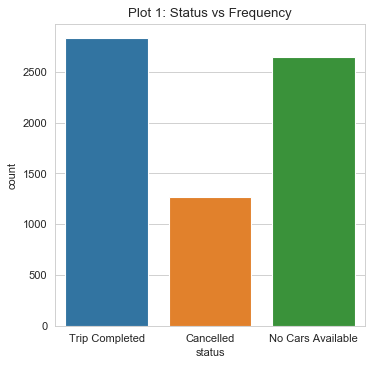

In [20]:
# Status vs Frequency Plot
sns.set_style("whitegrid")
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='status', data=df)
plt.title('Plot 1: Status vs Frequency')
plt.show()

__From the above visualization we can say that:__
- Most of the requests (2650) go unanswered because of 'no cars available'.
- Significant number of requests (1264) get cancelled because of feasibility issues from drivers perspective.

In [21]:
# Frequency of requests across different request hours.
group_by_hour = df.groupby('request_hour')
pickup_hour = group_by_hour.request_id.count()
pickup_hour

request_hour
0     160
1      90
2      83
3     103
4      88
5     374
6     434
7     389
8     418
9     425
10    389
11    150
12    194
13    169
14    151
15    148
16    157
17    258
18    519
19    486
20    465
21    477
22    421
23    197
Name: request_id, dtype: int64

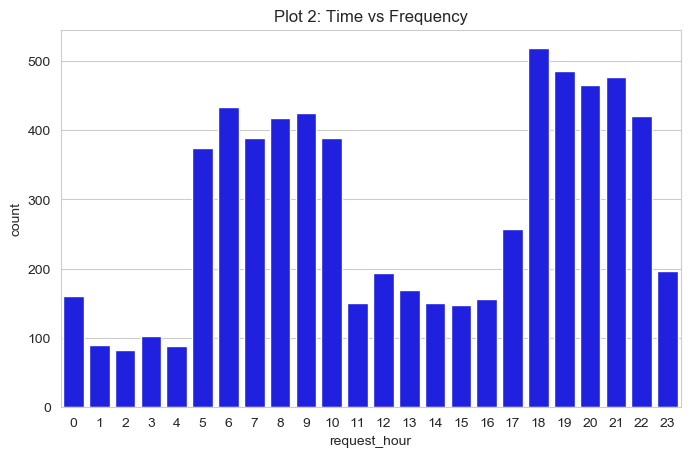

In [22]:
# Request_hour vs Frequency plot
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x= 'request_hour', color='blue', data=df)
plt.title('Plot 2: Time vs Frequency')
plt.show()

Below are a list of observations from the above graph:
- We can see a surge in the number of requests in the morning (5 to 10) & evening (18-22).
- At all the other times, the requests vary from low to moderately high.

Let's divide the 24 hours in a day as follows:
- 1 to 4: Early morning
- 5 to 10: Morning
- 11 to 17: Mid day
- 18 to 22: Evening
- 23 to 24/0: Late Night

In [23]:
# Binning time into different time slots as explained above. Let's create a new column to store these time slots.
bins = [0, 4, 10, 17, 22, 24]
group_names = ['Early_Morning', 'Morning', 'Mid_day', 'Evening', 'Late_Night' ]
df['time_slot'] = pd.cut(df['request_hour'], bins, labels = group_names)
df.loc[df.time_slot.isnull(), 'time_slot'] = 'Late_Night'
df.head()

,request_id,pickup_point,status,request_timestamp,request_hour,request_route,time_slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,12,Airport_to_City,Mid_day
1,867,Airport,Trip Completed,2016-07-11 17:57:00,18,Airport_to_City,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,9,City_to_Airport,Morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,21,Airport_to_City,Evening
4,3112,City,Trip Completed,2016-07-13 08:33:16,9,City_to_Airport,Morning


In [24]:
# Frequency of requests across different time_slots
group_by_time = df.groupby('time_slot')
time = group_by_time.request_id.count()
time

time_slot
Early_Morning     364
Morning          2429
Mid_day          1227
Evening          2368
Late_Night        357
Name: request_id, dtype: int64

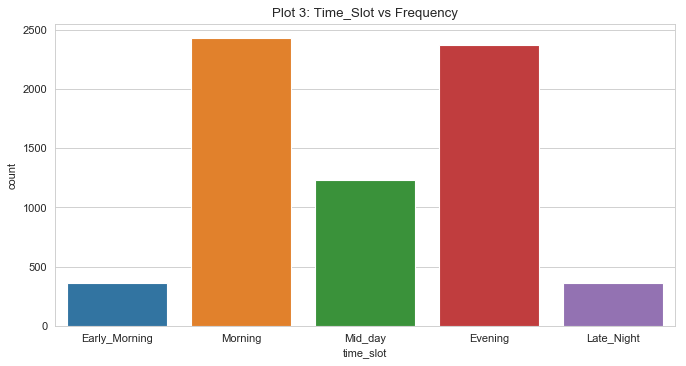

In [25]:
# Plot of time_slot vs frequency
plt.figure(figsize=(10,5),dpi=80)
sns.countplot(x= 'time_slot', data=df)
plt.title('Plot 3: Time_Slot vs Frequency')
plt.show()

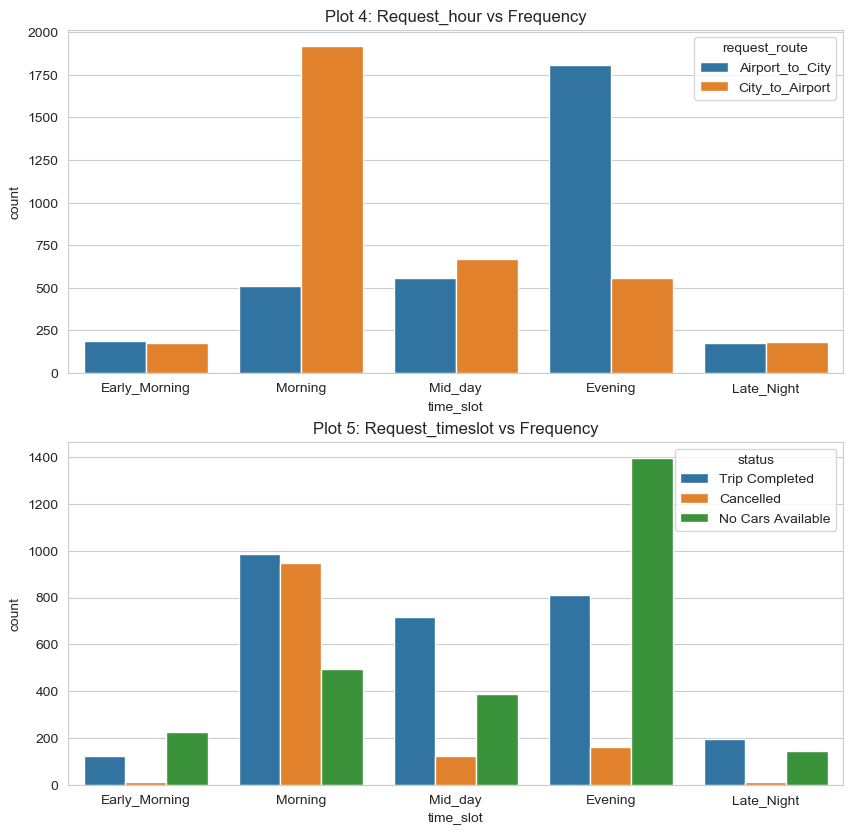

In [26]:
# Let's see how the requests are distributed across request_hour and request_route
plt.figure(figsize=(10,10),dpi=100)

plt.subplot(2,1,1)
sns.countplot(x= 'time_slot',hue='request_route', data=df)
plt.title('Plot 4: Request_hour vs Frequency')

# Identifying problamatic timeslots. Problamatic timeslots are those times slots where we experience cancellation or 'no cars available'
plt.subplot(2,1,2)
sns.countplot(x= 'time_slot', hue='status', data=df)
plt.title('Plot 5: Request_timeslot vs Frequency')

plt.show()

### Observations from Plot 4:
- We can see a surge in the influx of requests at Morning & Evening.
- Majority of requests in the Morning time slot are from "City to Airport".
- Majority of request in the Evening time slot are from "Airport to City"

### Observations from Plot 5:
- Most of the requests are getting cancelled in the morning time slot. It explains that the drivers are hesistant to pick these trips probably because of less number of requests that they experience at airport on return.
- Most of the requests are unanswered in the evening time slot because there are not enough cabs to cater the demand.

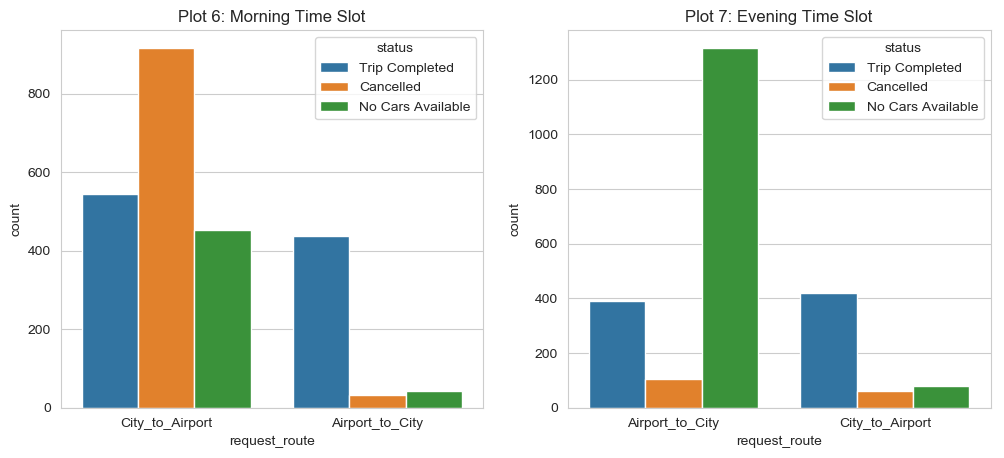

In [27]:
# Let's narrow down our analysis to morning and evening time slots.
# Identifying problamatic requests (city to airport / airport to city) in morning and evening time slot. 
# Problamatic requests are those requests which either get cancelled or 'no cars available'
plt.figure(figsize=(12,5),dpi=100)

plt.subplot(1,2,1)
sns.countplot(x= 'request_route', hue='status', data=df[df.time_slot == 'Morning'])
plt.title('Plot 6: Morning Time Slot')

plt.subplot(1,2,2)
sns.countplot(x= 'request_route', hue='status', data=df[df.time_slot == 'Evening'])
plt.title('Plot 7: Evening Time Slot')
plt.show()

### Observations from Plot 6:
- Morning: Requests made from the city to airport are experiencing high number of cancellations.
- Evening: Requests made from the airport to city are unanswered because of "no cars available"

## Demand and Supply Gap

### - Task 1: FInd the time slot where the highest gap exists

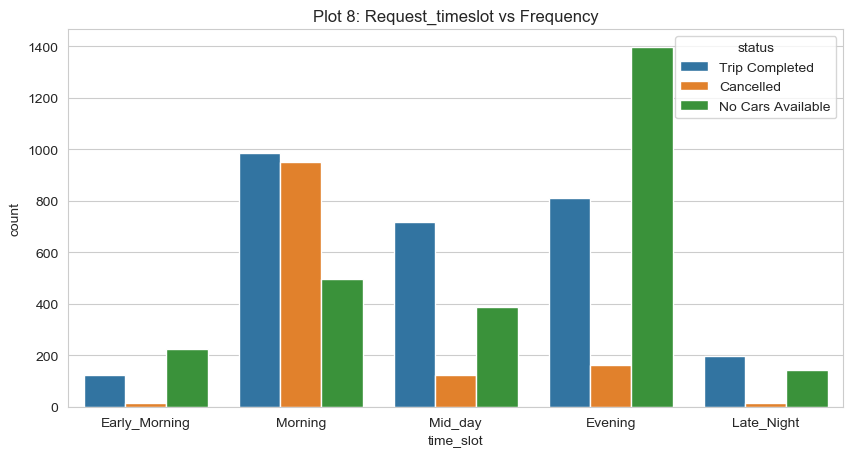

In [28]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(x= 'time_slot', hue='status', data=df)
plt.title('Plot 8: Request_timeslot vs Frequency')
plt.show()

Based on Plot 8, the following time slots have the highest demand & supply gap (as they have the most number of unfulfilled requests):
- Morning
- Evening

### - Task 2: Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

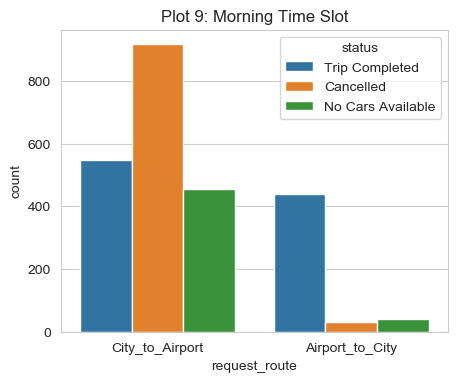

In [29]:
# Task 2.1: Identifying the type of request with high gap in the morning time slot
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x= 'request_route', hue='status', data=df[df.time_slot == 'Morning'])
plt.title('Plot 9: Morning Time Slot')
plt.show()

__Based on Plot 9, City to Airport has the highest supply-demand gap.__

In [30]:
# Task 2.2: Calculate supply, demand & gap for the identified request route (City_to_Airport)
morning_demand = len(df[(df.time_slot == 'Morning') & (df.request_route == 'City_to_Airport')].index)
morning_demand

1916

In [31]:
morning_supply = len(df[(df.time_slot == 'Morning') & (df.request_route == 'City_to_Airport')& 
                        (df.status == 'Trip Completed')].index)
morning_supply

546

In [32]:
morning_gap = morning_demand - morning_supply
morning_gap

1370

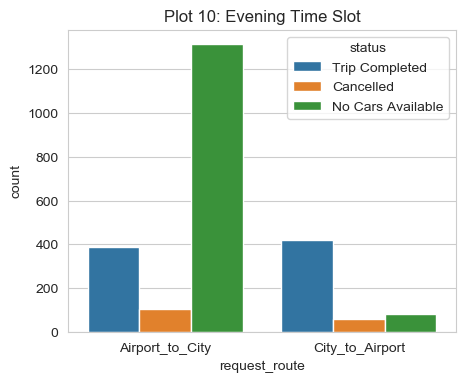

In [33]:
# Task 2.3: Identifying the type of request with high gap in the morning time slot
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x= 'request_route', hue='status', data=df[df.time_slot == 'Evening'])
plt.title('Plot 10: Evening Time Slot')
plt.show()

__Based on Plot 10, Airport to City has the highest supply-demand gap.__

In [34]:
# Task 2.4: Calculate supply, demand & gap for the identified request route (City_to_Airport)
evening_demand = len(df[(df.time_slot == 'Evening') & (df.request_route == 'Airport_to_City')].index)
evening_demand

1808

In [35]:
evening_supply = len(df[(df.time_slot == 'Evening') & (df.request_route == 'Airport_to_City')& 
                        (df.status == 'Trip Completed')].index)
evening_supply

390

In [36]:
evening_gap = evening_demand - evening_supply
evening_gap

1418

### Overall Summary
- Morning Time Slot: 
    - Total number of requests from city to airport: 1916
    - Number of requests from city to airport that are completed: 546
    - Gap: 1370
    
- Evening Time Slot: 
    - Total number of requests from airport to city: 1808
    - Number of requests from airport to city that are completed: 390
    - Gap: 1418
    
### Reasons & Recommendations for Supply-Demand Gap:
Let’s understand the reasons for supply demand gap for each of the time slot.

__Morning Time-Slot:__
- __Observation:__ We can see that a large number of requests in the morning time slot are from “City to Airport” (1916 requests).  Off these many requests from “City to Airport”, only 546 requests are completed. Many requests are cancelled by the drivers (916).
- __Reason:__ Drivers might be cancelling trips because of the less number of requests from “Airport to City” on return which would result in more waiting time for the next trip.
- __Recommendation:__ We would recommend Uber to increase the fare price on all trips from “City to Airport” in the morning slot. This would encourage more drivers to accept the requests.

__Evening Time-Slot:__
- __Observation:__ We can see that a large number of requests in the evening time slot are from “Airport to city” (1808 requests).  Off these many requests from “Airport to city”, only 390 requests are completed. Many requests are unanswered because of no cabs available (1314).
- __Reason:__ There might not be enough cars to cater the huge demand in this time slot.
- __Recommendation:__ We would recommend Uber to increase the number of cars from airport in the evening time slot to leverage this huge demand.